In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [2]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [3]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())


      Sex  Survived
0  female  0.742038
1    male  0.188908


In [4]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [5]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [6]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [7]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [8]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.542056
1   (16.0, 32.0]  0.356659
2   (32.0, 48.0]  0.363985
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [10]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [11]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']         = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare','IsAlone','Age','Sex','Fare','Pclass'], axis = 1)
#, 'IsAlone','Age','Sex','Fare','Pclass'
test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
test  = test.values

   Survived  Embarked  Title
0         0         0      1
1         1         1      3
2         1         0      2
3         1         0      3
4         0         0      1
5         0         2      1
6         0         0      1
7         0         0      4
8         1         0      3
9         1         1      3


In [13]:
def get_ensambled_n_models_pred(clf_names_to_ensamble,clf_pred_results):
    res = clf_pred_results
  #  print(clf_names_to_ensamble)
    
    number_of_models = len(clf_names_to_ensamble)
    mean_res = number_of_models/2
   
 #  print ('mean res', mean_res)
    
    result = None
    for name in clf_names_to_ensamble:
       
      #  print(name, clf_pred_results[name])
        
        if result is None:
            result = res[name]
        else:
            result += res[name]
#         print ('the type of result is:', type(result))
#         print ('the result is:', result)
    
   # print ('the result \n', result)
    result[result < mean_res] = 0
    result[result >= mean_res] = 1
   # print ('after the comparison \n', result)
    
    return result

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

import random


def run_n_times_machine_modelling(number_of_runs, models_to_ensemble):
    results = []
    
   
    
  
    for i in range(number_of_runs):
        
        k = np.random.randint(5,10)
        classifiers = [
            KNeighborsClassifier(n_neighbors=k),
            
            LogisticRegression(),
            DecisionTreeClassifier(),
        ]
        
        
        n_splits =np.random.randint(5,30)

        random_state =  np.random.randint(1,200,10)
        

        log_cols = ["Classifier", "Accuracy"]
        log  = pd.DataFrame(columns=log_cols)

        sss = StratifiedShuffleSplit(n_splits=n_splits, random_state=200)
        
        X = train[0::, 1::]
        y = train[0::, 0]

        acc_dict = {}


        clf_list = list()

        #here i have
        clf_pred_results = {}
        clf_pred_proba = {}

        KNN_string = 'KNeighborsClassifier' #0
        SVC_string = 'SVC'  #1
        TREE_string = 'DecisionTreeClassifier' #2
        
        FOREST_string ='RandomForestClassifier' #3
        GAUSIAN_string = 'GaussianNB'          #4
        LogReg_string ='LogisticRegression'      #5
        MLP = 'MLPClassifier' #6

        names=[KNN_string,LogReg_string,TREE_string]

        
        
        for train_index, test_index in sss.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]



            for clf in classifiers:
                name = clf.__class__.__name__
#                 print('the name is', name)
                clf.fit(X_train, y_train)
                clf_list.append(clf_list)
                test_predictions = clf.predict(X_test)
                test_proba = clf.predict_proba(X_test)[:, 1] 
#                 print('test_predictinos full \n' , test_predictions[0:5])
#                 print('test_predictions probability \n', test_proba[0:5])
                acc = accuracy_score(y_test, test_predictions)
        #         print ('the acc is:', acc)

                # add Y to the specific Y
                clf_pred_results[name] = test_predictions
                clf_pred_proba[name] = test_proba
                if name in acc_dict:
                    acc_dict[name] += acc/n_splits

                else:
                    acc_dict[name] = acc/n_splits
            
                
            for ensemble in models_to_ensemble:
                idencies_of_ensembles_to_test = ensemble
                ensmemble_to_test= [ names[i] for i in idencies_of_ensembles_to_test ]
                ensmemble_name = ",".join(ensmemble_to_test)
                test_predictions = get_ensambled_n_models_pred(ensmemble_to_test,clf_pred_proba)
                acc = accuracy_score(y_test, test_predictions)
                #print()
                if ensmemble_name in acc_dict:
                    acc_dict[ensmemble_name] += acc/n_splits

                else:
                    acc_dict[ensmemble_name] = acc/n_splits

#         print(acc_dict)
        results.append(acc_dict)
    return results


In [24]:
from scipy import stats
results = run_n_times_machine_modelling(200,[[0,1],[0,2],[2,1]])

res_df = pd.DataFrame (results)
res_df
res_df.rename(columns={'KNeighborsClassifier':'KNN','DecisionTreeClassifier':'Dtree','LogisticRegression':'LogReg',
                      'KNeighborsClassifier,LogisticRegression':'KNN_LR',
                      'KNeighborsClassifier,DecisionTreeClassifier':'KNN_Dtree',
                      'DecisionTreeClassifier,LogisticRegression':'LR_Dtree'},inplace=True)
res_df

,KNN,LogReg,Dtree,KNN_LR,KNN_Dtree,LR_Dtree
0,0.783333,0.721429,0.801587,0.780159,0.780159,0.796825
1,0.785556,0.728889,0.804444,0.788889,0.788889,0.801111
2,0.753535,0.728283,0.805051,0.781818,0.781818,0.801010
3,0.784127,0.731746,0.804762,0.777778,0.777778,0.798413
4,0.777778,0.719444,0.796528,0.775000,0.775000,0.790972
...,...,...,...,...,...,...
195,0.775439,0.720468,0.797661,0.774854,0.774854,0.790058
196,0.781818,0.716667,0.797475,0.765657,0.765657,0.788384
197,0.775556,0.718519,0.796296,0.775556,0.775556,0.790370
198,0.771556,0.717778,0.800000,0.771111,0.771111,0.790667


In [26]:
res_df

,KNN,LogReg,Dtree,KNN_LR,KNN_Dtree,LR_Dtree
0,0.783333,0.721429,0.801587,0.780159,0.780159,0.796825
1,0.785556,0.728889,0.804444,0.788889,0.788889,0.801111
2,0.753535,0.728283,0.805051,0.781818,0.781818,0.801010
3,0.784127,0.731746,0.804762,0.777778,0.777778,0.798413
4,0.777778,0.719444,0.796528,0.775000,0.775000,0.790972
...,...,...,...,...,...,...
195,0.775439,0.720468,0.797661,0.774854,0.774854,0.790058
196,0.781818,0.716667,0.797475,0.765657,0.765657,0.788384
197,0.775556,0.718519,0.796296,0.775556,0.775556,0.790370
198,0.771556,0.717778,0.800000,0.771111,0.771111,0.790667


In [27]:
a = res_df.mean()
a.index
pd.DataFrame({'mean':a})


,mean
KNN,0.773703
LogReg,0.722911
Dtree,0.799939
KNN_LR,0.776766
KNN_Dtree,0.776766
LR_Dtree,0.793304


<function matplotlib.pyplot.legend(*args, **kwargs)>

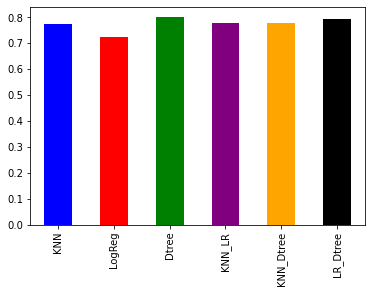

In [28]:
import matplotlib.pyplot as plt
plt.figure()
a.plot(kind='bar',color=['blue','red','green','purple','orange','black'])
plt.legend

In [29]:
res_df

,KNN,LogReg,Dtree,KNN_LR,KNN_Dtree,LR_Dtree
0,0.783333,0.721429,0.801587,0.780159,0.780159,0.796825
1,0.785556,0.728889,0.804444,0.788889,0.788889,0.801111
2,0.753535,0.728283,0.805051,0.781818,0.781818,0.801010
3,0.784127,0.731746,0.804762,0.777778,0.777778,0.798413
4,0.777778,0.719444,0.796528,0.775000,0.775000,0.790972
...,...,...,...,...,...,...
195,0.775439,0.720468,0.797661,0.774854,0.774854,0.790058
196,0.781818,0.716667,0.797475,0.765657,0.765657,0.788384
197,0.775556,0.718519,0.796296,0.775556,0.775556,0.790370
198,0.771556,0.717778,0.800000,0.771111,0.771111,0.790667


In [22]:
res_df.mean().sort_values()

LogReg       0.722375
KNN          0.775582
KNN_LR       0.776637
KNN_Dtree    0.776637
LR_Dtree     0.793313
Dtree        0.799915
dtype: float64

In [23]:
res_df
# KNN_vs_LR = stats.ttest_ind(res_df.LogisticRegression,res_df.KNeighborsClassifier)[1]
# KNN_vs_Dtree = stats.ttest_ind(res_df.DecisionTreeClassifier,res_df.KNeighborsClassifier)[1]
# LR_vs_Dtree = stats.ttest_ind(res_df.DecisionTreeClassifier,res_df.LogisticRegression)[1]

# KNeighborsClassifier,LogisticRegression
# KNeighborsClassifier,DecisionTreeClassifier
# DecisionTreeClassifier,LogisticRegression


e01= stats.stats.ttest_ind(res_df['KNN_LR'],res_df['KNN_Dtree'])[1]
e02= stats.stats.ttest_ind(res_df['KNN_LR'],res_df['LR_Dtree'])[1]
e12= stats.stats.ttest_ind(res_df['KNN_Dtree'],res_df['LR_Dtree'])[1]
pval_data = [e01,e02,e12]
df = pd.DataFrame({'p_val':pval_data})
df.index = ['|KNN+LR|vs|KNN+Dtree|','|KNN+LR|VS|LR+Dtree|','|KNN+Dtree|VS|Dtree+LR|']
df

,p_val
|KNN+LR|vs|KNN+Dtree|,1.000000e+00
|KNN+LR|VS|LR+Dtree|,2.845377e-52
|KNN+Dtree|VS|Dtree+LR|,2.845377e-52
